In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib

In [156]:
df=pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [158]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [159]:
df.dropna(inplace=True)

In [160]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='Churn'>

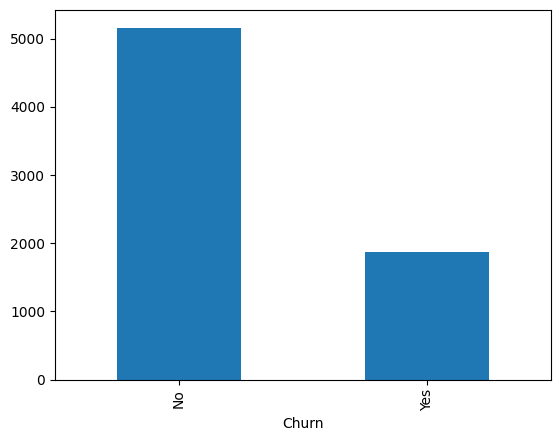

In [161]:
df['Churn'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

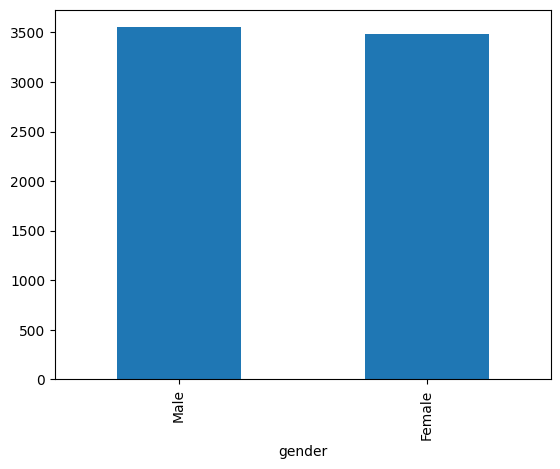

In [162]:
gen_value= df['gender'].value_counts()

gen_value.plot(kind='bar')

<Axes: ylabel='count'>

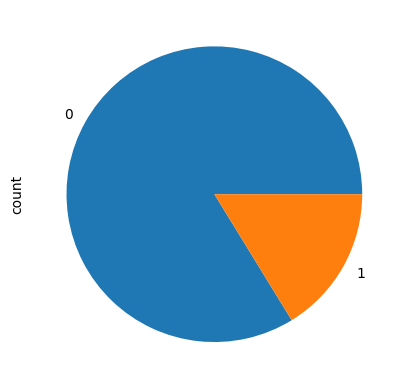

In [163]:
df['SeniorCitizen'].value_counts().plot(kind='pie')

# 1 means yes 0 means no

In [164]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='gender', ylabel='count'>

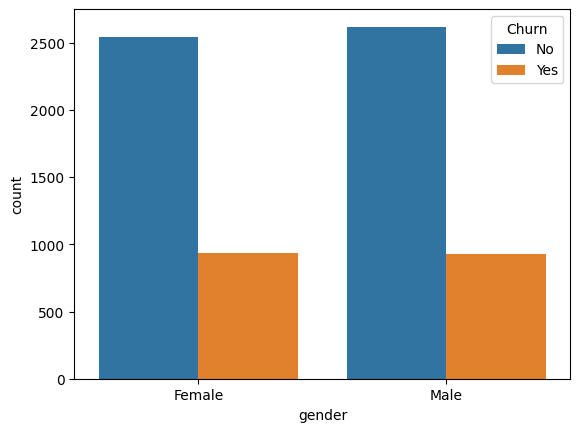

In [165]:
sns.countplot(data=df,x='gender',hue='Churn')

<Axes: xlabel='Churn', ylabel='gender'>

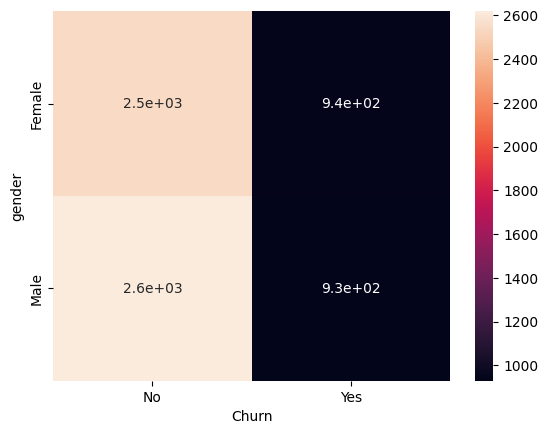

In [166]:
heatmap_data=pd.crosstab(df['gender'],df['Churn'])
sns.heatmap(heatmap_data,annot=True)

In [167]:
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: ylabel='count'>

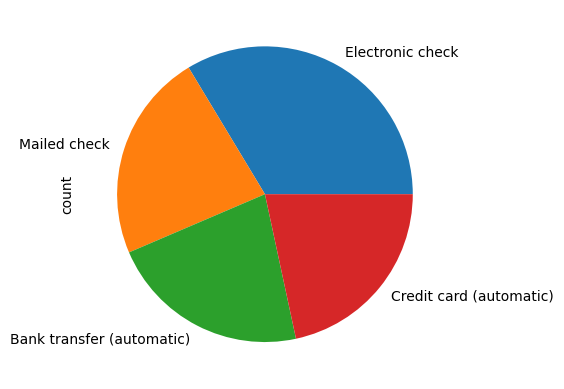

In [168]:
df['PaymentMethod'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

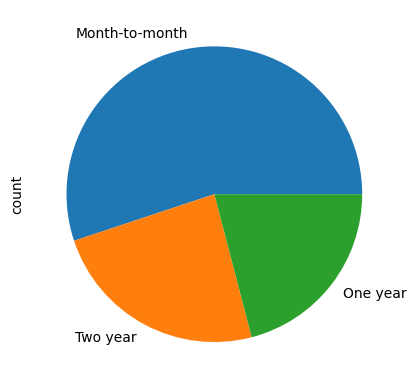

In [169]:
df['Contract'].value_counts().plot(kind='pie')

In [170]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [171]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<Axes: >

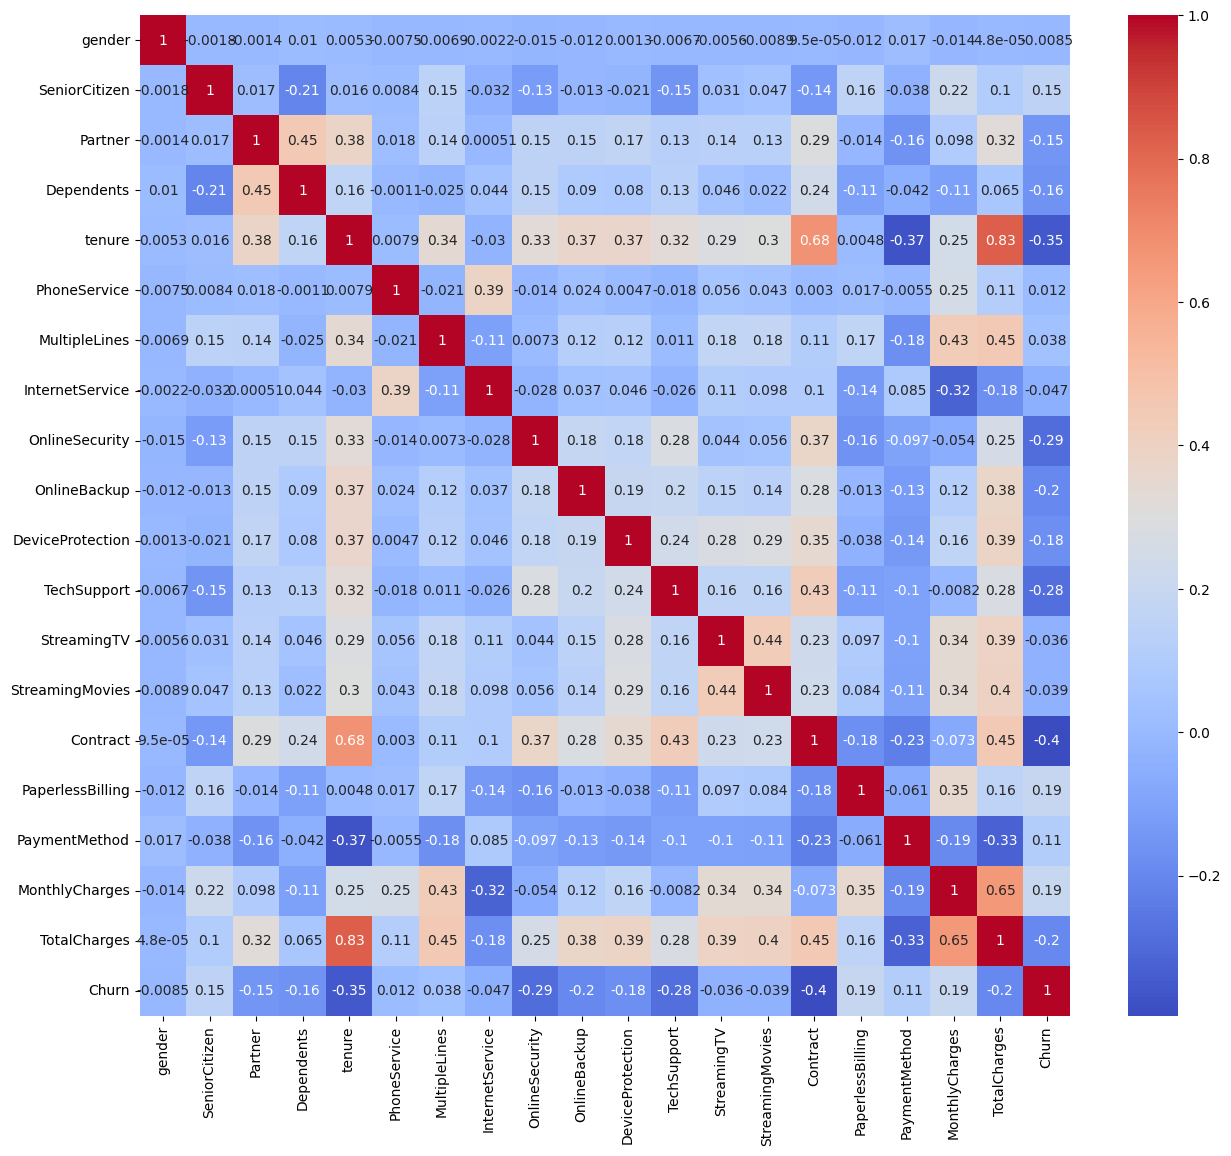

In [172]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [174]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [176]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [177]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [178]:
X_train

array([[-1.01378388, -0.43758982, -0.9624811 , ..., -1.49123331,
        -0.51862031, -0.08790784],
       [ 0.98640353, -0.43758982, -0.9624811 , ..., -0.55085356,
        -0.3744434 , -0.92128463],
       [-1.01378388, -0.43758982,  1.03898144, ...,  0.38952619,
         0.43261589,  0.96378055],
       ...,
       [ 0.98640353, -0.43758982, -0.9624811 , ...,  0.38952619,
         0.5453059 , -0.65824663],
       [-1.01378388, -0.43758982, -0.9624811 , ..., -1.49123331,
        -1.48974299, -0.56791079],
       [ 0.98640353,  2.28524509,  1.03898144, ...,  0.38952619,
         0.29672501, -0.35842967]])

In [179]:
def model_predict(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print()
    print(classification_report(y_pred,y_test))
    f1=f1_score(y_pred,y_test, average='weighted')
    acc=accuracy_score(y_pred,y_test)
    return acc, f1




In [180]:
models={
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [181]:

model_names=[]
accuracy=[]
f1=[]

for model_name,model in models.items():
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    acc, f= model_predict(model,X_train,y_train,X_test,y_test)

    accuracy.append(acc)
    f1.append(f)
    model_names.append(model_name)
    



              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1109
           1       0.49      0.62      0.55       298

    accuracy                           0.79      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.81      0.79      0.79      1407


              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1129
           1       0.48      0.64      0.55       278

    accuracy                           0.79      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.82      0.79      0.80      1407


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1086
           1       0.51      0.60      0.55       321

    accuracy                           0.78      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.79      0.78      0.78      1407



In [182]:
results_df = pd.DataFrame({
    'Model': model_names,
    'accuracy':acc,
    'F1':f1
})

In [183]:
results_df

,Model,accuracy,F1
0,LogisticRegression,0.777541,0.793689
1,RandomForestClassifier,0.777541,0.800440
2,XGBClassifier,0.777541,0.783241


In [184]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = .75,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))

0.7974413646055437


In [185]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [186]:
param_grid

{'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [187]:
cv = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [188]:
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_features=0.75,
                                                    max_leaf_nodes=30,
                                                    n_estimators=500, n_jobs=-1,
                                                    oob_score=True,
                                                    random_state=50),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [189]:
best_params = cv.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}


In [190]:
cv.best_score_

np.float64(0.8046222222222223)

In [191]:
model=RandomForestClassifier(**best_params)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [192]:
# Make predictions
prediction_test = model.predict(X_test)
print (accuracy_score(y_test, prediction_test))

0.7953091684434968


In [193]:
save_path='/Users/akashmukherjee/Programming/Practise ML/Telco Customer Churn/models/random_forest.joblib'
joblib.dump(model, save_path)

['/Users/akashmukherjee/Programming/Practise ML/Telco Customer Churn/models/random_forest.joblib']